In [3]:
import pandas as pd
from SyntheticControlMethods import DiffSynth, Synth
from rich import print

## Demo Example

In [2]:
# Import data
data_dir = "https://raw.githubusercontent.com/OscarEngelbrektson/SyntheticControlMethods/master/examples/datasets/"
df = pd.read_csv(data_dir + "smoking_data" + ".csv")
df.head()

,state,year,cigsale,lnincome,beer,age15to24,retprice
0,Alabama,1970.0,89.8,NaN,NaN,0.178862,39.6
1,Alabama,1971.0,95.4,NaN,NaN,0.179928,42.7
2,Alabama,1972.0,101.1,9.498476,NaN,0.180994,42.3
3,Alabama,1973.0,102.9,9.550107,NaN,0.182060,42.1
4,Alabama,1974.0,108.2,9.537163,NaN,0.183126,43.1


Running model

In [4]:
df = df.rename(columns={"cigsale": "Pandemic"})
sc = Synth(df, "Pandemic", "state", "year", 1989, "California", n_optim=10, pen="auto")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.20995D+04    |proj g|=  2.00000D+01

At iterate    3    f=  1.36783D+02    |proj g|=  1.81324D+01

At iterate    6    f=  1.35389D+02    |proj g|=  1.94035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      9     11     0     0   1.940D-02   1.354D+02
  F =   135.38891275424271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7    116     18     0     6   6.490D+00   2.197D+03
  F =   2197.1176416593821     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44723D+03    |proj g|=  1.53292D+01

At iterate    3    f=  5.05580D+02    |proj g|=  6.73321D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    6    f=  3.29502D+02    |proj g|=  1.32355D+01

At iterate    9    f=  3.25170D+02    |proj g|=  5.47402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13     15     0     0   2.842D-04   3.252D+02
  F =   325.16995314035881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07230D+03    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu

In [7]:
sc.original_data.weight_df

Weight
New Hampshire  0.253153
Utah           0.746847

In [6]:
sc.original_data.comparison_df

,California,Synthetic California,WMAPE,Importance
Pandemic,116.21,116.07,66.67,0.22
lnincome,10.03,9.72,0.31,0.22
beer,24.28,18.81,10.87,0.22
age15to24,0.18,0.19,0.01,0.22
retprice,66.64,63.38,3.25,0.14


In [9]:
print(f'PEN: {sc.original_data.pen}')

PEN: 1.8763149147474656

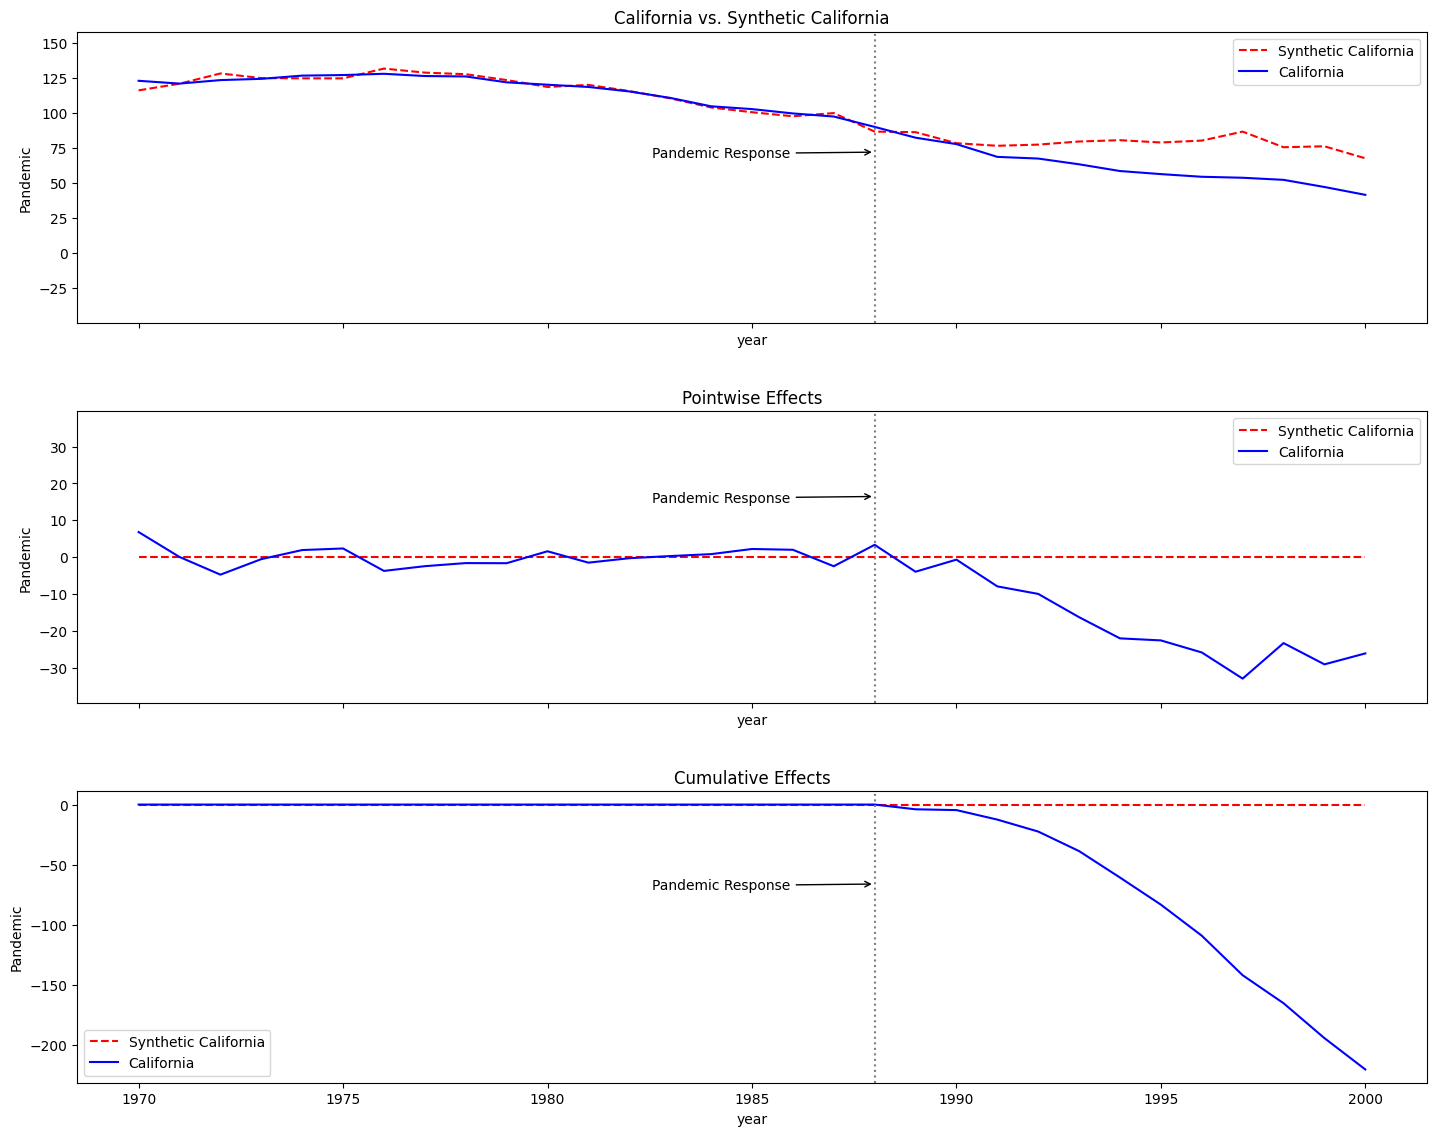

In [11]:
sc.plot(
    ["original", "pointwise", "cumulative"],
    treated_label="California",
    synth_label="Synthetic California",
    treatment_label="Pandemic Response",
)